# Downloading the Dataset

In [1]:
# Installing required packages (only run once if not installed)
# %pip install kagglehub
# %pip install pandas
# %pip install openpyxl   

In [2]:
# Importing necessary libraries
import pandas as pd       # parse CSV data / explore data
import kagglehub          # download dataset CSVs
import os                 # create CSV paths and handle filesystem

In [3]:
# Download latest version
path = kagglehub.dataset_download("hmavrodiev/london-bike-sharing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\m\.cache\kagglehub\datasets\hmavrodiev\london-bike-sharing-dataset\versions\1


In [4]:
# Get the CSV filename : full path(s) from KaggleHub dataset folder path
def find_csv_files(path):
    csv_paths = {}

    for root, _, files in os.walk(path):
        for f in files:
            if f.lower().endswith(".csv"):
                if f not in csv_paths:
                    csv_paths[f] = []
                csv_paths[f].append(os.path.join(root, f))

    if not csv_paths:
        raise FileNotFoundError(f"No .csv files found in dataset")

    return csv_paths

csv_paths = find_csv_files(path)
print(csv_paths)

{'london_merged.csv': ['C:\\Users\\m\\.cache\\kagglehub\\datasets\\hmavrodiev\\london-bike-sharing-dataset\\versions\\1\\london_merged.csv']}


# Exploring the Dataset
(objectives? why are we exploring / pulling specific aspects, what do we want to know about the dataset before proceeding)

In [5]:
# Read in CSV file as pandas dataframe
bikes = pd.read_csv(csv_paths['london_merged.csv'][0])
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
# Show dataset
bikes

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [7]:
# count the unique values in the weather_code column
bikes.weather_code.value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [8]:
# count the unique values in the season column
bikes.season.value_counts()

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [9]:
# Renaming the columns
new_cols_dict = {
    'timestamp':'time',
    'cnt':'count', 
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

# Renaming the columns to the specified column names
bikes.rename(new_cols_dict, axis=1, inplace=True)

In [10]:
# changing humidity balues to percentages
bikes.humidity_percent = bikes.humidity_percent / 100

In [11]:
# creating a season dictionary to map the integers to seasons
season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}

# creating a weather dictionary to map the weather_code to weather states
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

# changing the seasons column data type to string
bikes.season = bikes.season.astype('str')
# mapping the values 0-3 to the actual written seasons
bikes.season = bikes.season.map(season_dict)

# changing the weather column data type to string
bikes.weather = bikes.weather.astype('str')
# mapping the values to the actual written weathers
bikes.weather = bikes.weather.map(weather_dict)

In [12]:
# converting time to datetime for time based analysis
bikes['time'] = pd.to_datetime(bikes['time'])

In [13]:
# checking our dataframe to see if the mappings have worked
bikes

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,Broken clouds,0.0,0.0,winter
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,Cloudy,0.0,0.0,winter
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,Cloudy,0.0,0.0,winter
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,Cloudy,0.0,0.0,winter


# Visualizing Data
Because the dataset focuses on number of rentals and records data on the overall weather, visualizing data should show differences and trends (if any) between aspects of weather. I decided to capture these categories using matplotlib visualization: (explain any more if necessary)
- How many bikes were rented per season?
- How many bikes were rented on average per weather category?
- Correlation between bike rentals and humidity, temperature, and wind speed.

In [ ]:
%pip install matplotlib seaborn
%pip install statsmodels

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

For the average bike rentals per season and average bikes rented per weather state, I used bar graphs. This is because there are clearly defined limited categories for the seasons and weather categories, bar graphs emphasize these categories, showing the numerical difference between them.

### Average Bike Rentals Per Season

C:\Users\m\AppData\Local\Temp\ipykernel_5868\3398555635.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_counts = bikes.groupby('season')['count'].mean()
C:\Users\m\AppData\Local\Temp\ipykernel_5868\3398555635.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')


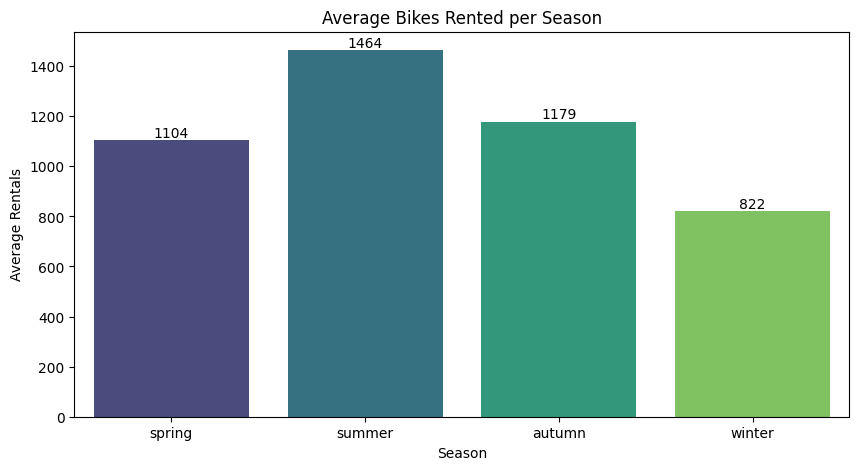

In [64]:
# Order the seasons
season_order = ['spring', 'summer', 'autumn', 'winter']
bikes['season'] = pd.Categorical(bikes['season'], categories=season_order, ordered=True)

# Average rental counts per season
season_counts = bikes.groupby('season')['count'].mean()

# Plot figure
plt.figure(figsize=(10,5))
bars = sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')
plt.title("Average Bikes Rented per Season")
plt.ylabel("Average Rentals")
plt.xlabel("Season")

# Add average counts on top
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:.0f}', 
                  xy=(bar.get_x() + bar.get_width() / 2, height), # center count at the top of bar
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha='center', va='bottom')

plt.show()

### Average Bikes Rented per Weather State

C:\Users\m\AppData\Local\Temp\ipykernel_5868\4293280436.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_counts = bikes.groupby('weather')['count'].mean()
C:\Users\m\AppData\Local\Temp\ipykernel_5868\4293280436.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='viridis')


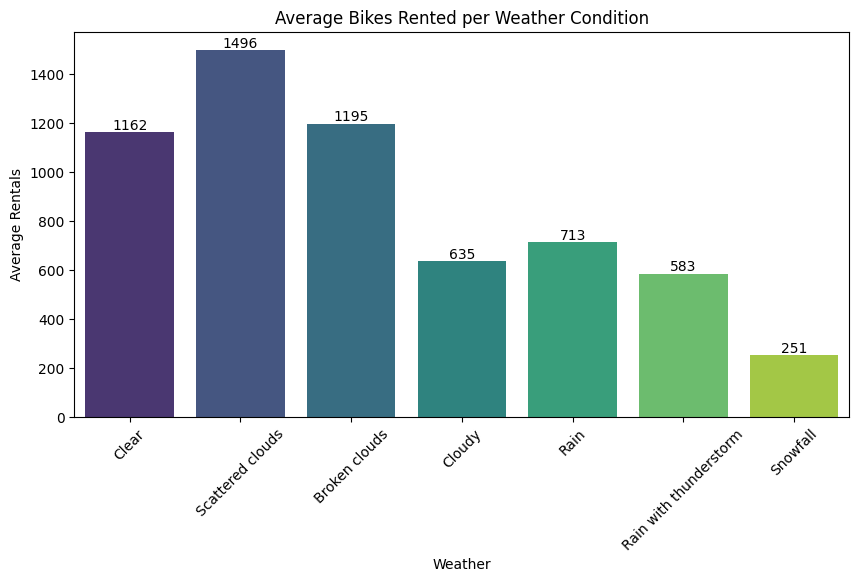

In [63]:
# Order the weather states
weather_order = ['Clear', 'Scattered clouds', 'Broken clouds', 'Cloudy', 'Rain', 'Rain with thunderstorm', 'Snowfall']
bikes['weather'] = pd.Categorical(bikes['weather'], categories=weather_order, ordered=True)

# Average rental counts per weather state
weather_counts = bikes.groupby('weather')['count'].mean()

# Plot figure
plt.figure(figsize=(10,5))
bars = sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='viridis')
plt.title("Average Bikes Rented per Weather Condition")
plt.ylabel("Average Rentals")
plt.xlabel("Weather")
plt.xticks(rotation=45)

# Add average counts on top
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:.0f}', 
                  xy=(bar.get_x() + bar.get_width() / 2, height), # center count at the top of bar
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha='center', va='bottom')

plt.show()

## Correlation between bike rentals and humidity, temperature, and wind speed.
For the following graphs, I use a binned scatterplot to show the relationships. This is because not all of the relationships are linear or smooth, scatterplots show the variability. Binned because the data size is very large, showing all inputs would make it harder to interpret the data visually. There are not clearly defined categories so using bar graphs wouldn't be ideal.

### Rentals vs Temperature

C:\Users\m\AppData\Local\Temp\ipykernel_5868\3338441614.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = bikes.groupby(pd.cut(bikes[var], bins=50))['count'].mean()


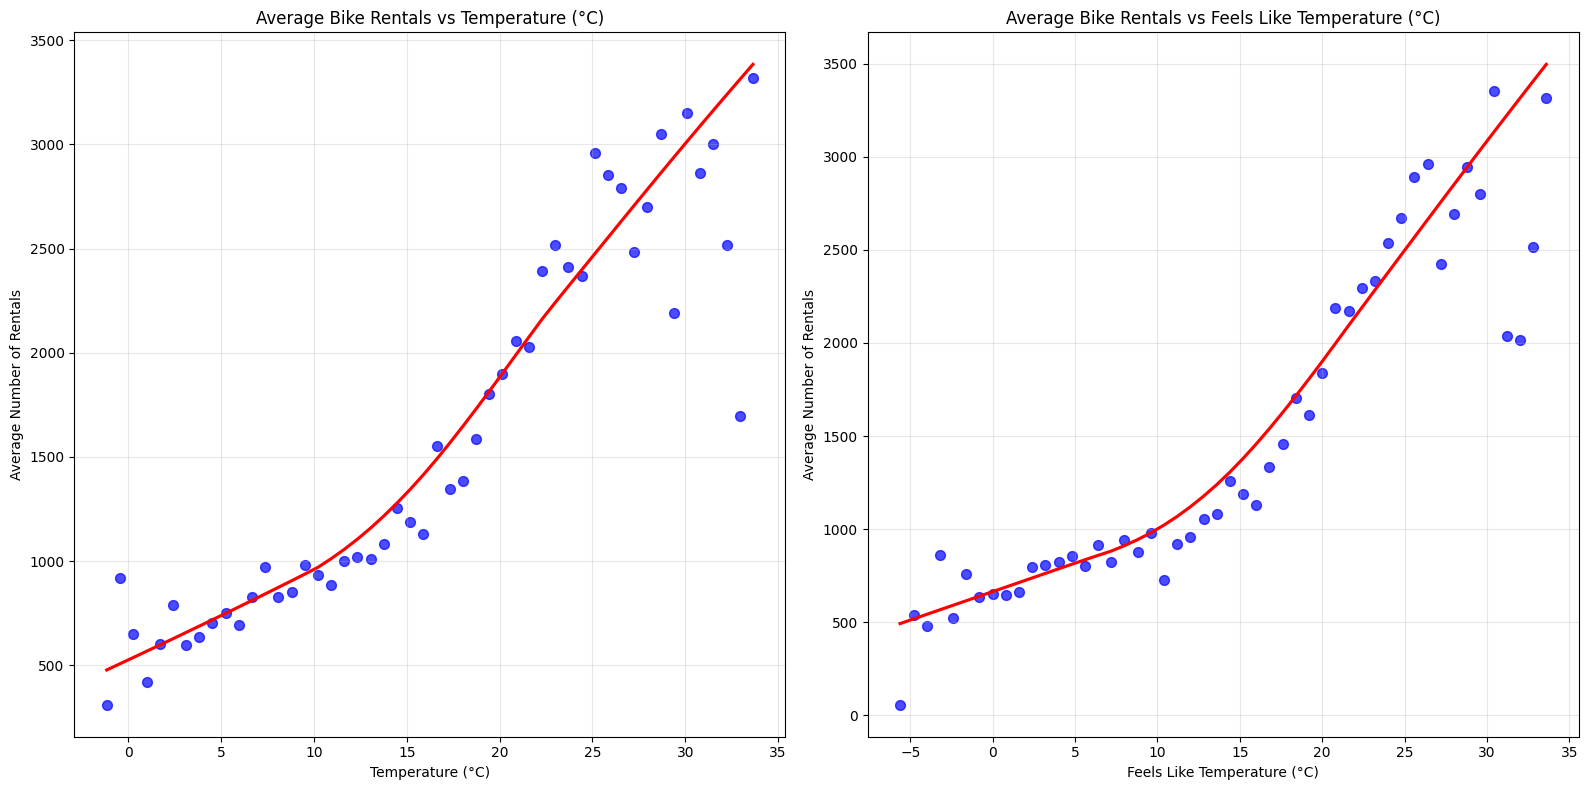

In [ ]:
# List of temperature variables and labels
temp_vars = ['temp_real_C', 'temp_feels_like_C']
labels = ['Temperature (C)', 'Feels Like Temperature (C)']

plt.figure(figsize=(16,8))

for i, (var, label) in enumerate(zip(temp_vars, labels), 1):
    # Create bins and compute averages
    binned_avg = bikes.groupby(pd.cut(bikes[var], bins=50))['count'].mean()
    bin_centers = [interval.mid for interval in binned_avg.index]
    
    # Plot
    plt.subplot(1, 2, i)
    plt.scatter(bin_centers, binned_avg.values, s=50, alpha=0.7, color='blue')
    sns.regplot(x=bin_centers, y=binned_avg.values, scatter=False, color='red', lowess=True)

    plt.title(f"Average Bike Rentals vs {label}")
    plt.xlabel(label)
    plt.ylabel("Average Number of Rentals")
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#### Rentals vs Humidity

C:\Users\m\AppData\Local\Temp\ipykernel_5868\3396063105.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = bikes.groupby('humidity_bin')['count'].mean()


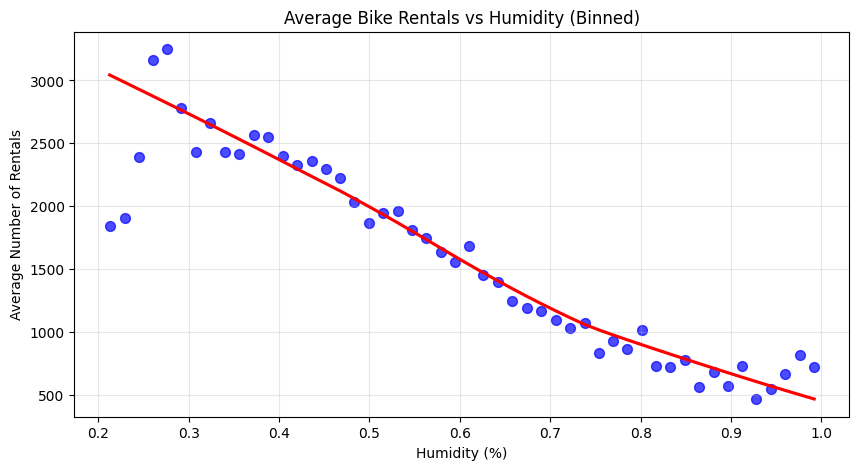

In [ ]:
plt.figure(figsize=(10,5))

# Create bins for humidity
bins = 50
bikes['humidity_bin'] = pd.cut(bikes['humidity_percent'], bins=bins)

# Compute the average rentals per bin
binned_avg = bikes.groupby('humidity_bin')['count'].mean()
bin_centers = [interval.mid for interval in binned_avg.index]

# Scatter plot of binned averages
plt.scatter(bin_centers, binned_avg.values, s=50, alpha=0.7, color='blue')
sns.regplot(x=bin_centers, y=binned_avg.values, scatter=False, color='red', lowess=True)

plt.title("Average Bike Rentals vs Humidity (Binned)")
plt.xlabel("Humidity (%)")
plt.ylabel("Average Number of Rentals")
plt.grid(alpha=0.3)
plt.show()

### Rentals vs Wind Speed

C:\Users\m\AppData\Local\Temp\ipykernel_5868\4068616233.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = bikes.groupby('wind_speed_bin')['count'].mean()


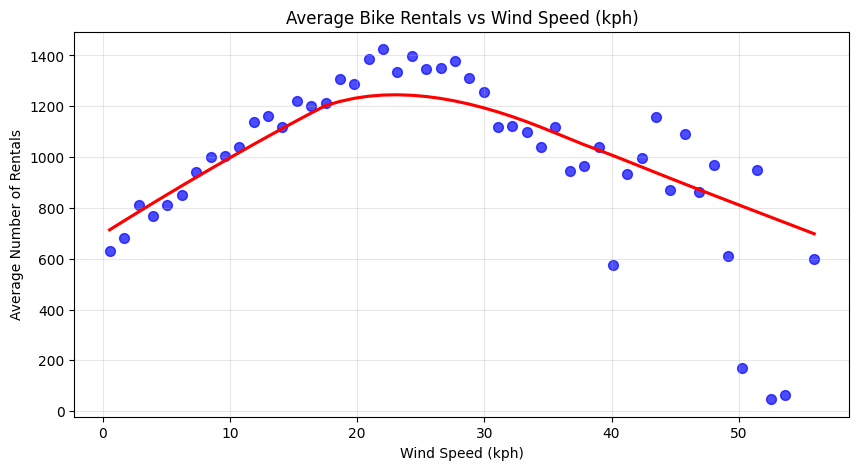

In [ ]:
plt.figure(figsize=(10,5))

# Create bins for wind speed
bins = 50
bikes['wind_speed_bin'] = pd.cut(bikes['wind_speed_kph'], bins=bins)

# Compute binned averages
binned_avg = bikes.groupby('wind_speed_bin')['count'].mean()
bin_centers = [interval.mid for interval in binned_avg.index]

# Scatter plot of binned averages
plt.scatter(bin_centers, binned_avg.values, s=50, alpha=0.7, color='blue')
sns.regplot(x=bin_centers, y=binned_avg.values, scatter=False, color='red', lowess=True)

plt.title("Average Bike Rentals vs Wind Speed (kph)")
plt.xlabel("Wind Speed (kph)")
plt.ylabel("Average Number of Rentals")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# List of numerical variables and titles
numeric_vars = ['humidity_percent', 'wind_speed_kph', 'temp_real_C', 'temp_feels_like_C']
titles = ['Humidity (%)', 'Wind Speed (kph)', 'Temperature (C)', 'Feels Like Temperature (C)']

plt.figure(figsize=(15,12))

for i, var in enumerate(numeric_vars, 1):
    # Create bins
    bins = 50
    bikes[f'{var}_bin'] = pd.cut(bikes[var], bins=bins)
    
    # Compute average rentals per bin
    binned_avg = bikes.groupby(f'{var}_bin')['count'].mean()
    
    # Bin centers for x-axis
    bin_centers = [interval.mid for interval in binned_avg.index]
    
    # Plot as scatter (no connecting lines)
    plt.subplot(2, 2, i)
    plt.scatter(bin_centers, binned_avg.values, s=50, color='blue')  # s=marker size
    plt.title(f"Average Bike Rentals vs {titles[i-1]}")
    plt.xlabel(titles[i-1])
    plt.ylabel("Average Number of Rentals")
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [23]:
# Writing the final dataframe to an excel file that we will use in our Tableau visualisations. The file will be the 'london_bikes_final.xlsx' file and the sheet name is 'Data'
bikes.to_excel('london_bikes_final.xlsx', sheet_name='Data')